In [1]:
#Importing Packages
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
import sympy as sy
from scipy import optimize as opt

In [2]:
# ODE Definition Function
def ODE(FM, t, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z):
    P,P_b,P_u,P_e,E,E_b,E_u,S = FM
    dPdt = y - (k*S_e + (k/W)*S)*P + j*P_b + f*(A_e/A_p)*E - e_i*P*(1-P_e/c) + e_o*P_e
    dP_bdt = (k*S_e + (k/W)*S)*P - j*P_b - a*P_b
    dP_udt = a*P_b - g*(A_p/A_e)*P_u
    dP_edt = e_i*P*(1-P_e/c) - e_o*P_e
    dEdt = b*E_u + j*E_b - (k/W)*S*E + g*(A_p/A_e)*P_u - f*(A_e/A_p)*E
    dE_bdt = (k/W)*S*E - j*E_b - a*E_b
    dE_udt = a*E_b - b*E_u - z*E_u
    dSdt = -(k/W)*S*((A_p/V)*P+(A_e/V)*E) + (j+a)*((A_p/V)*P_b+(A_e/V)*E_b) - (v_m*S)/(V*(K_m+S))
    dydt = [dPdt, dP_bdt, dP_udt, dP_edt, dEdt, dE_bdt, dE_udt, dSdt]
    return dydt

In [3]:
# Steady State Functions Creator Function
P, P_b, P_u, P_e, E, E_b, E_u, S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = sy.symbols("P, P_b, P_u, P_e, E, E_b, E_u, S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z")

# Steady State Functions Creator Function
def Steady_State_Functions():
    dPdt = y - (k*S_e + (k/W)*S)*P + j*P_b + f*(A_e/A_p)*E - e_i*P*(1-P_e/c) + e_o*P_e
    dP_bdt = (k*S_e + (k/W)*S)*P - j*P_b - a*P_b
    dP_udt = a*P_b - g*(A_p/A_e)*P_u
    dP_edt = e_i*P*(1-P_e/c) - e_o*P_e
    dEdt = b*E_u + j*E_b - (k/W)*S*E - f*(A_e/A_p)*E + g*(A_p/A_e)*P_u
    dE_bdt = (k/W)*S*E - j*E_b - a*E_b
    dE_udt = a*E_b - b*E_u - z*E_u
    dSdt = -(k/W)*S*((A_p/V)*P+(A_e/V)*E) + (j+a)*((A_p/V)*P_b+(A_e/V)*E_b) - (v_m*S)/(V*(K_m+S))

    sol = sy.solvers.solve([dPdt, dP_bdt, dP_udt, dP_edt, dEdt, dE_bdt, dE_udt],[P, P_b, P_u, P_e, E, E_b, E_u])
    # sol = sy.solvers.solve([dPdt, dP_bdt, dP_udt, dP_edt, dEdt, dE_bdt, dE_udt, dSdt], [P, P_b, P_u, P_e, E, E_b, E_u, S])
    
    return sol

sol = Steady_State_Functions()
# print(sol)

print("Solution with every parameter")
print('    P   = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[0][0])
print('    P_b = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[0][1])
print('    P_u = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[0][2])
print('    P_e = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[0][3])
print('    E   = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[0][4])
print('    E_b = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[0][5])
print('    E_u = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[0][6])
print()
print("Solution with only S as a parameter")
print('    P   = lambda S:', sol[0][0])
print('    P_b = lambda S:', sol[0][1])
print('    P_u = lambda S:', sol[0][2])
print('    P_e = lambda S:', sol[0][3])
print('    E   = lambda S:', sol[0][4])
print('    E_b = lambda S:', sol[0][5])
print('    E_u = lambda S:', sol[0][6])


Solution with every parameter
    P   = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z: W*y*(a + j)*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(A_p*S*a**2*k**2*z*(S + S_e*W))
    P_b = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z: y*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(A_p*S*a**2*k*z)
    P_u = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z: A_e*y*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(A_p**2*S*a*g*k*z)
    P_e = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z: W*c*e_i*y*(a + j)*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(A_e*W**2*a**2*b*e_i*f*y + A_e*W**2*a**2*e_i*f*y*z + 2*A_e*W**2*a*b*e_i*f*j*y + 2*A_e*W**2*a*e_i*f*j*y*z + A_e*W**2*b*e_i*f*j**2*y + A_e*W**2*e_i*f*j**2*y*z + A_p*S**2*a**2*c*e_o*k**2*z + A_p*S*S_e*W*a**2*c*e_o*k

In [4]:
# Steady States Solution Function
def Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z, plotting=False):
    """Computes the steady states given parameters
    
    Parameters:
        The values of the parameters in our model
    
    Returns:
        steadies (tuple): The steady states of each state
    """
    # Defining the steady state functions in terms of S
    P   = lambda S: W*y*(a + j)*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(A_p*S*a**2*k**2*z*(S + S_e*W))
    P_b = lambda S: y*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(A_p*S*a**2*k*z)
    P_u = lambda S: A_e*y*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(A_p**2*S*a*g*k*z)
    P_e = lambda S: W*c*e_i*y*(a + j)*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(A_e*W**2*a**2*b*e_i*f*y + A_e*W**2*a**2*e_i*f*y*z + 2*A_e*W**2*a*b*e_i*f*j*y + 2*A_e*W**2*a*e_i*f*j*y*z + A_e*W**2*b*e_i*f*j**2*y + A_e*W**2*e_i*f*j**2*y*z + A_p*S**2*a**2*c*e_o*k**2*z + A_p*S*S_e*W*a**2*c*e_o*k**2*z + A_p*S*W*a**2*e_i*k*y*z + A_p*S*W*a*e_i*j*k*y*z)
    E   = lambda S: W*y*(a + j)*(b + z)/(S*a*k*z)
    E_b = lambda S: y*(b + z)/(a*z)
    E_u = lambda S: y/z
    
    # Define the dSdt function is terms of the other functions and S
    dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S)+(A_e/V)*E(S)) + (j+a)*((A_p/V)*P_b(S)+(A_e/V)*E_b(S)) - (v_m*S)/(V*(K_m+S))
    # Find the steady state of S using bisection method (the S that makes dSdt=0)
    min_check = 1e-5
    max_check = 100
    S_steady = opt.bisect(dSdt, min_check, max_check)

    if plotting:
        S = np.linspace(min_check,max_check,100)
        dSdt_sample = dSdt(S)
        zero = np.zeros_like(S)
        plt.plot(S, dSdt_sample)
        plt.plot(S, zero)
        plt.show()
    
    # Calculate the steady states of the other states
    P_steady = P(S_steady)
    P_b_steady = P_b(S_steady)
    P_u_steady = P_u(S_steady)
    P_e_steady = P_e(S_steady)
    E_steady = E(S_steady)
    E_b_steady = E_b(S_steady)
    E_u_steady = E_u(S_steady)

    # Return the steady states
    return P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady

In [5]:
# ODE Solver
def Solve_ODE(ODE, y0, T, num, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z):
    t_span = np.linspace(0, T, num)
    sol = odeint(ODE, y0, t_span, args = (A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z))
    return t_span, sol

In [38]:
# Standard Parameters Function
def Parameters():
    # Define the parameters
    A_e = 47
    A_p = 314
    a = 1
    b = 1
    c = 1e4
    e_i = .3
    e_o = .3
    f = .1
    g = .1
    j = 1e2
    K_m = 2.5
    K_d = .74
    k = j/K_d
    S_e = .1
    y = .000083
    W = 32
    v_m = 8.8 * 10**3
    V = 523
    z = .002

    # Return the paramters
    return A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z

In [7]:
# Varying plotter function
def vary_plot(vary_domain, vary_param, P_steadies, P_b_steadies, P_u_steadies, P_e_steadies, E_steadies, E_b_steadies, E_u_steadies, S_steadies):
    # Transform into numpy arrays
    P_steadies = np.array(P_steadies)
    P_b_steadies = np.array(P_b_steadies)
    P_u_steadies = np.array(P_u_steadies)
    P_e_steadies = np.array(P_e_steadies)
    E_steadies = np.array(E_steadies)
    E_b_steadies = np.array(E_b_steadies)
    E_u_steadies = np.array(E_u_steadies)
    S_steadies = np.array(S_steadies)

    # Create arrays for total in each domain
    P_total = P_steadies + P_b_steadies + P_u_steadies + P_e_steadies
    E_total = E_steadies + E_b_steadies + E_u_steadies
    Total = P_total + E_total

    # Plot Combined Domains
    plt.plot(vary_domain, Total, "g", label="Total Steady")
    plt.plot(vary_domain, P_total, "b", label="PM Steady")
    plt.plot(vary_domain, E_total, "r", label="EM Steady")
    plt.xlabel(vary_param)
    plt.ylabel("Fur4")
    plt.title("Fur4 Steady States (Combined)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Intracellular Uracil
    plt.plot(vary_domain, S_steadies, "k", label="Intracellular Uracil")
    plt.xlabel(vary_param)
    plt.ylabel("Intracellular Uracil ($S$)")
    plt.title("Intracellular Uracil Steady States")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Individual domains
    plt.plot(vary_domain, P_steadies, "b", label="PM")
    plt.plot(vary_domain, P_b_steadies, "g", label="PM Bound")
    plt.plot(vary_domain, P_u_steadies, "r", label="PM Ubiq")
    plt.plot(vary_domain, P_e_steadies, "k", label="PM Eiso")
    plt.plot(vary_domain, E_steadies, "b--", label="EM")
    plt.plot(vary_domain, E_b_steadies, "g--", label="EM Bound")
    plt.plot(vary_domain, E_u_steadies, "r--", label="EM Ubiq")
    plt.xlabel(vary_param)
    plt.ylabel("Fur4")
    plt.title("Fur4 Steady States (Itemized)")
    plt.legend()
    plt.tight_layout()
    plt.show()






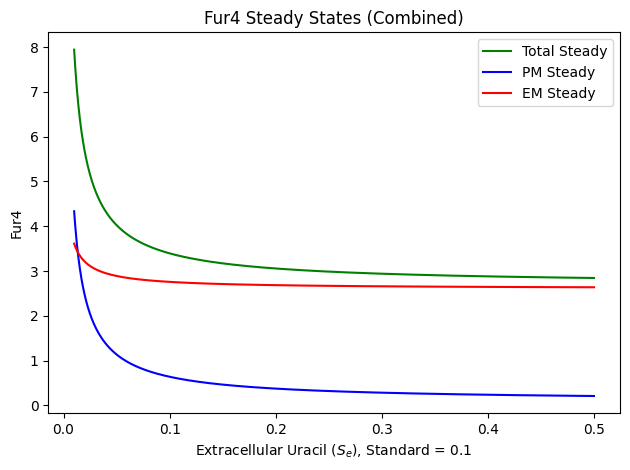

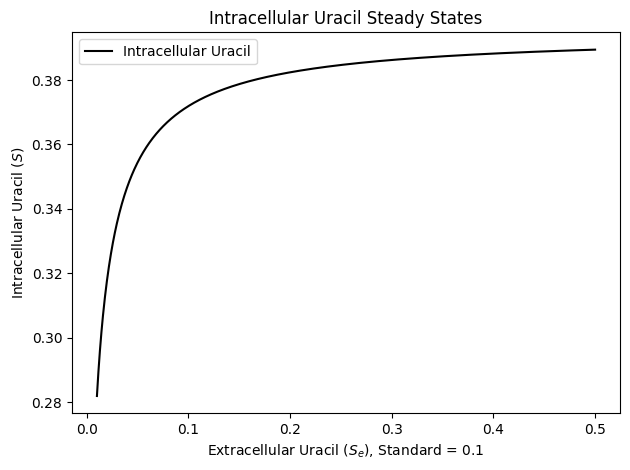

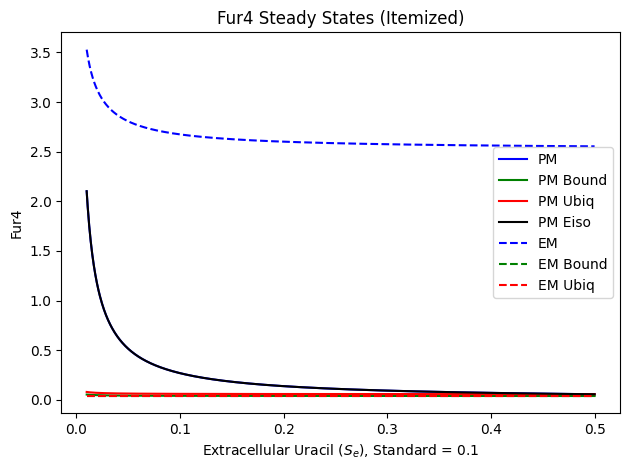

In [8]:
# Steady States Varying Extracellular Uracil

# Define Parameters
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()

# Define domain of the varying parameter
min_level = 0.01
max_level = 0.5
vary_domain = np.linspace(min_level, max_level, 1000)
vary_param = f"Extracellular Uracil ($S_e$), Standard = {S_e}"

# Initialize lists of each variable
P_steadies = []
P_b_steadies = []
P_u_steadies = []
P_e_steadies = []
E_steadies = []
E_b_steadies = []
E_u_steadies = []
S_steadies = []

# Iterate through the varying values
for S_e in vary_domain:
    P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady = Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
    P_steadies.append(P_steady)
    P_b_steadies.append(P_b_steady)
    P_u_steadies.append(P_u_steady)
    P_e_steadies.append(P_e_steady)
    E_steadies.append(E_steady)
    E_b_steadies.append(E_b_steady)
    E_u_steadies.append(E_u_steady)
    S_steadies.append(S_steady)

vary_plot(vary_domain, vary_param, P_steadies, P_b_steadies, P_u_steadies, P_e_steadies, E_steadies, E_b_steadies, E_u_steadies, S_steadies)

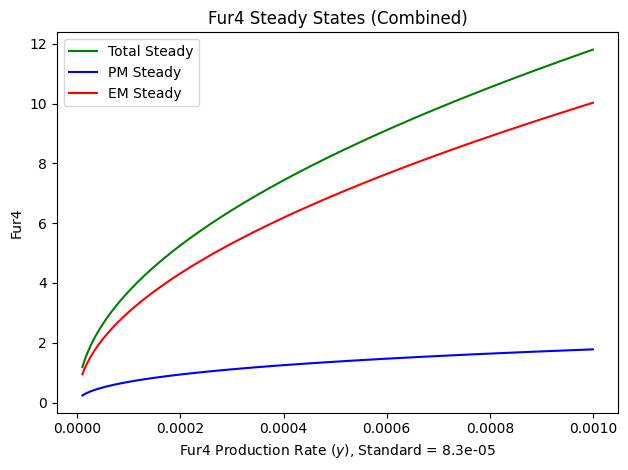

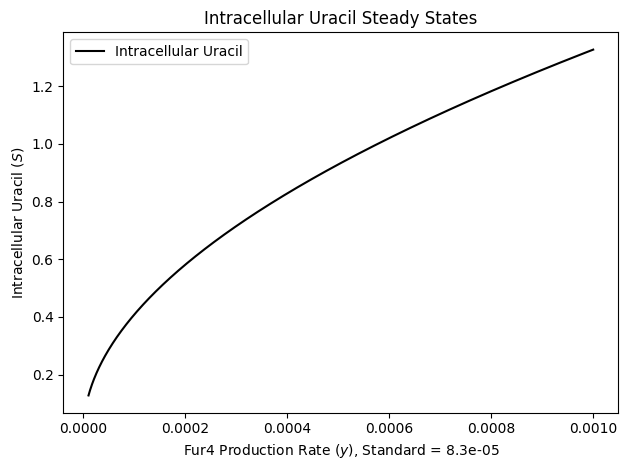

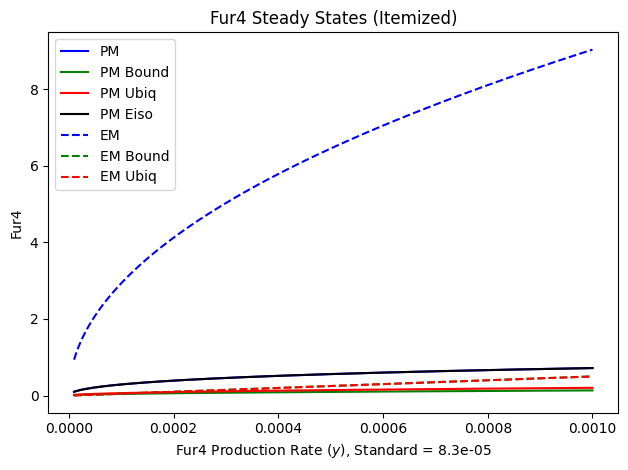

In [9]:
# Steady States Varying Fur4 Production Rate

# Define Parameters
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()

# Define domain of the varying parameter
min_level = 1e-5
max_level = 1e-3
vary_domain = np.linspace(min_level, max_level, 1000)
vary_param = f"Fur4 Production Rate ($y$), Standard = {y}"

# Initialize lists of each variable
P_steadies = []
P_b_steadies = []
P_u_steadies = []
P_e_steadies = []
E_steadies = []
E_b_steadies = []
E_u_steadies = []
S_steadies = []

# Iterate through the varying values
for y in vary_domain:
    P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady = Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
    P_steadies.append(P_steady)
    P_b_steadies.append(P_b_steady)
    P_u_steadies.append(P_u_steady)
    P_e_steadies.append(P_e_steady)
    E_steadies.append(E_steady)
    E_b_steadies.append(E_b_steady)
    E_u_steadies.append(E_u_steady)
    S_steadies.append(S_steady)

vary_plot(vary_domain, vary_param, P_steadies, P_b_steadies, P_u_steadies, P_e_steadies, E_steadies, E_b_steadies, E_u_steadies, S_steadies)

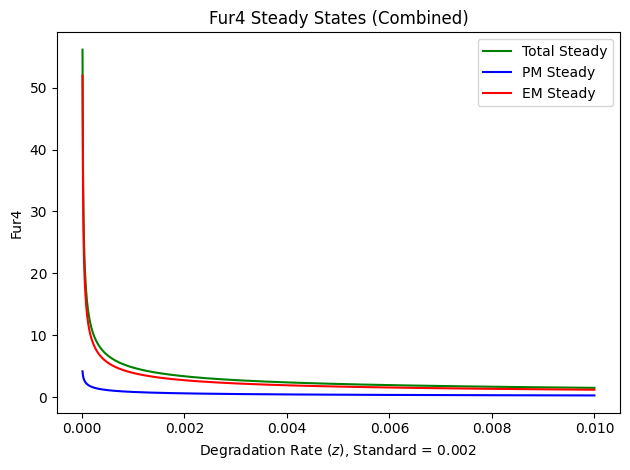

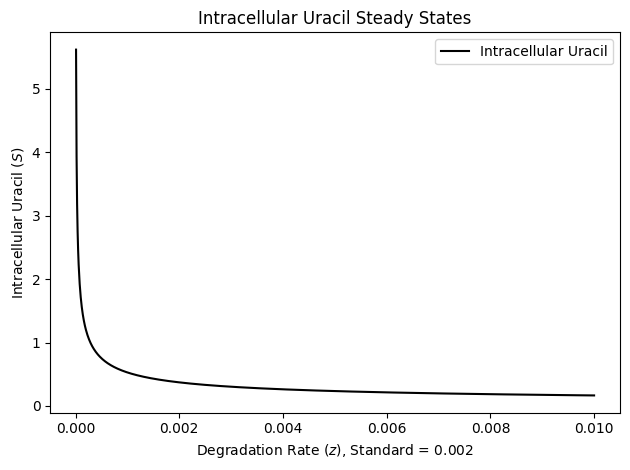

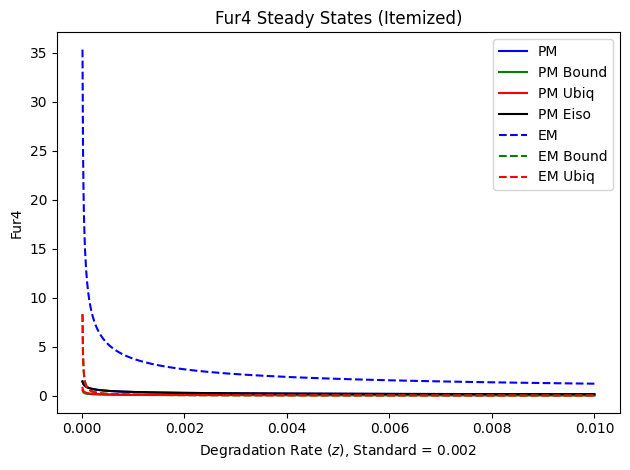

In [10]:
# Steady States Varying Degradation Rate

# Define Parameters
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()

# Define domain of the varying parameter
min_level = 0.00001
max_level = 0.01
vary_domain = np.linspace(min_level, max_level, 1000)
vary_param = f"Degradation Rate ($z$), Standard = {z}"

# Initialize lists of each variable
P_steadies = []
P_b_steadies = []
P_u_steadies = []
P_e_steadies = []
E_steadies = []
E_b_steadies = []
E_u_steadies = []
S_steadies = []

# Iterate through the varying values
for z in vary_domain:
    P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady = Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
    P_steadies.append(P_steady)
    P_b_steadies.append(P_b_steady)
    P_u_steadies.append(P_u_steady)
    P_e_steadies.append(P_e_steady)
    E_steadies.append(E_steady)
    E_b_steadies.append(E_b_steady)
    E_u_steadies.append(E_u_steady)
    S_steadies.append(S_steady)

vary_plot(vary_domain, vary_param, P_steadies, P_b_steadies, P_u_steadies, P_e_steadies, E_steadies, E_b_steadies, E_u_steadies, S_steadies)

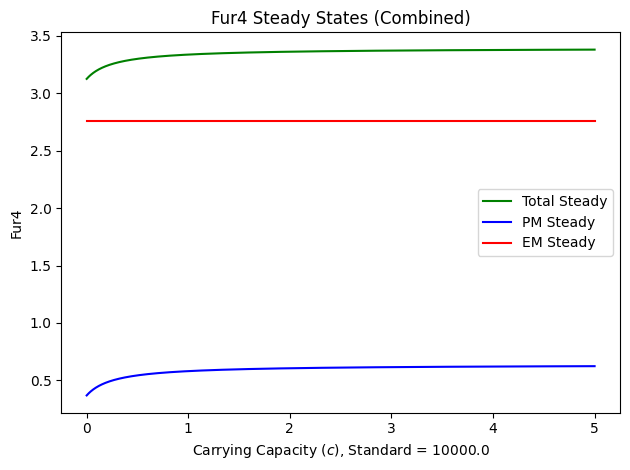

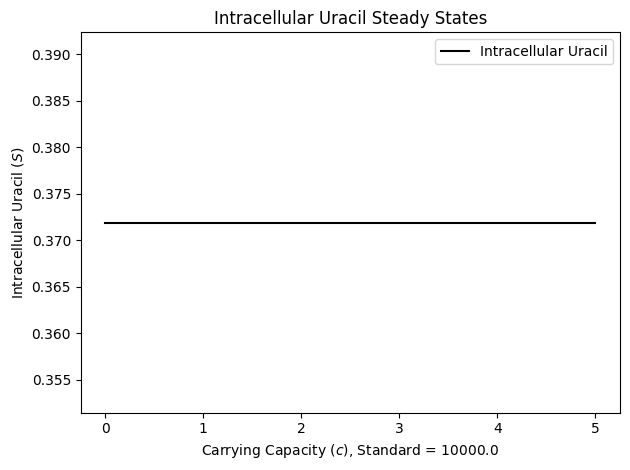

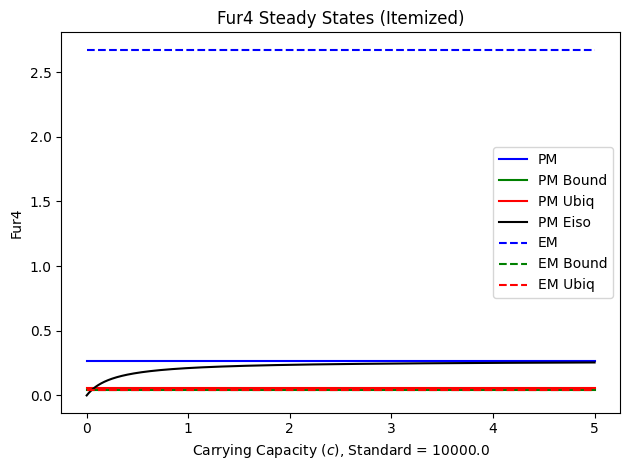

In [11]:
# Steady States Varying Carrying Capacity

# Define Parameters
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()

# Define domain of the varying parameter
min_level = 0
max_level = 5
vary_domain = np.linspace(min_level, max_level, 1000)
vary_param = f"Carrying Capacity ($c$), Standard = {c}"

# Initialize lists of each variable
P_steadies = []
P_b_steadies = []
P_u_steadies = []
P_e_steadies = []
E_steadies = []
E_b_steadies = []
E_u_steadies = []
S_steadies = []

# Iterate through the varying values
for c in vary_domain:
    P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady = Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
    P_steadies.append(P_steady)
    P_b_steadies.append(P_b_steady)
    P_u_steadies.append(P_u_steady)
    P_e_steadies.append(P_e_steady)
    E_steadies.append(E_steady)
    E_b_steadies.append(E_b_steady)
    E_u_steadies.append(E_u_steady)
    S_steadies.append(S_steady)

vary_plot(vary_domain, vary_param, P_steadies, P_b_steadies, P_u_steadies, P_e_steadies, E_steadies, E_b_steadies, E_u_steadies, S_steadies)

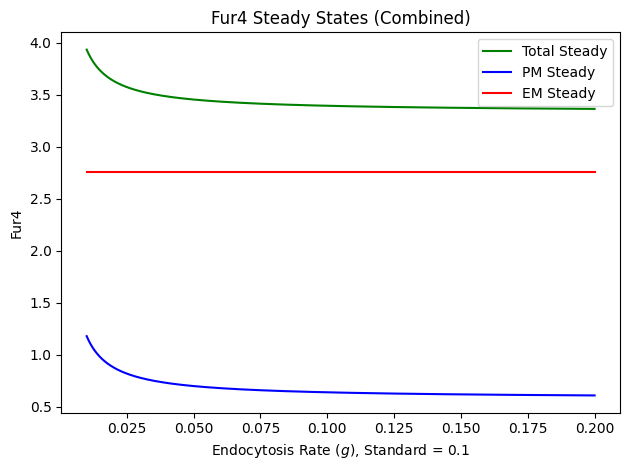

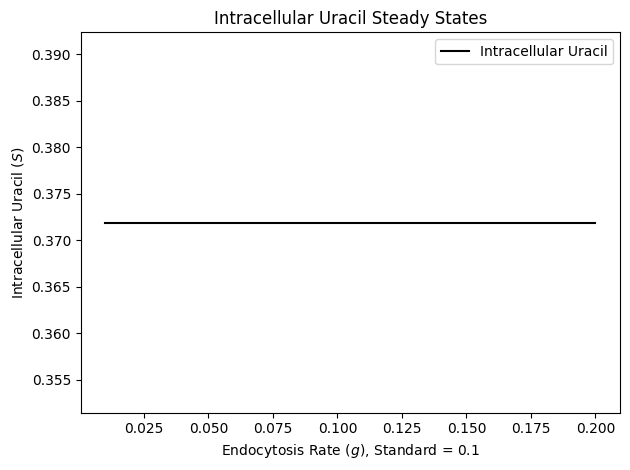

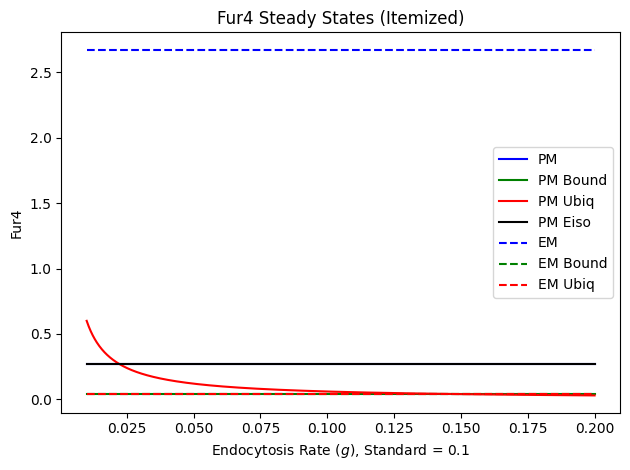

In [12]:
# Steady States Varying Endocytosis Rate

# Define Parameters
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()

# Define domain of the varying parameter
min_level = 0.01
max_level = 0.2
vary_domain = np.linspace(min_level, max_level, 1000)
vary_param = f"Endocytosis Rate ($g$), Standard = {g}"

# Initialize lists of each variable
P_steadies = []
P_b_steadies = []
P_u_steadies = []
P_e_steadies = []
E_steadies = []
E_b_steadies = []
E_u_steadies = []
S_steadies = []

# Iterate through the varying values
for g in vary_domain:
    P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady = Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
    P_steadies.append(P_steady)
    P_b_steadies.append(P_b_steady)
    P_u_steadies.append(P_u_steady)
    P_e_steadies.append(P_e_steady)
    E_steadies.append(E_steady)
    E_b_steadies.append(E_b_steady)
    E_u_steadies.append(E_u_steady)
    S_steadies.append(S_steady)

vary_plot(vary_domain, vary_param, P_steadies, P_b_steadies, P_u_steadies, P_e_steadies, E_steadies, E_b_steadies, E_u_steadies, S_steadies)

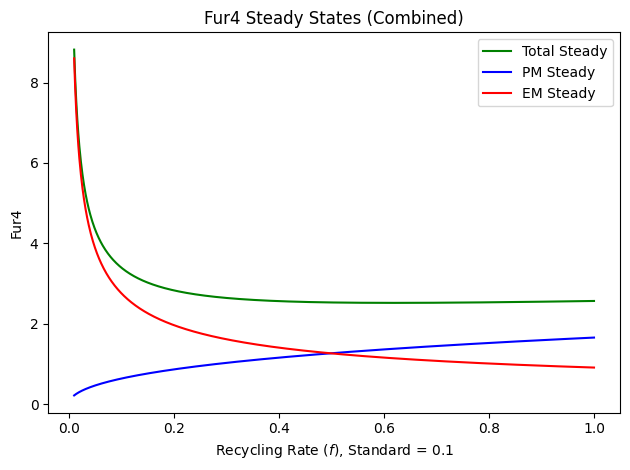

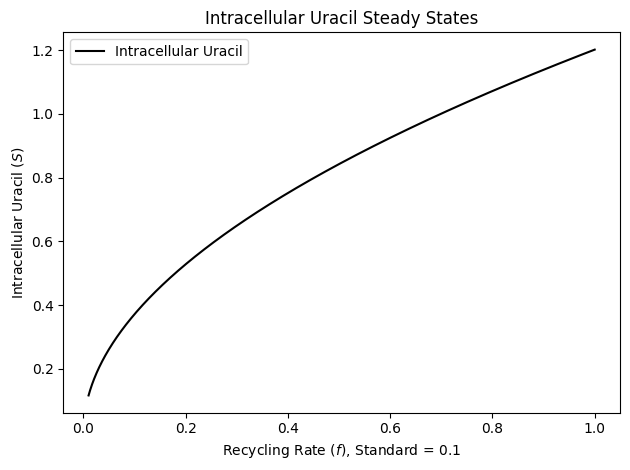

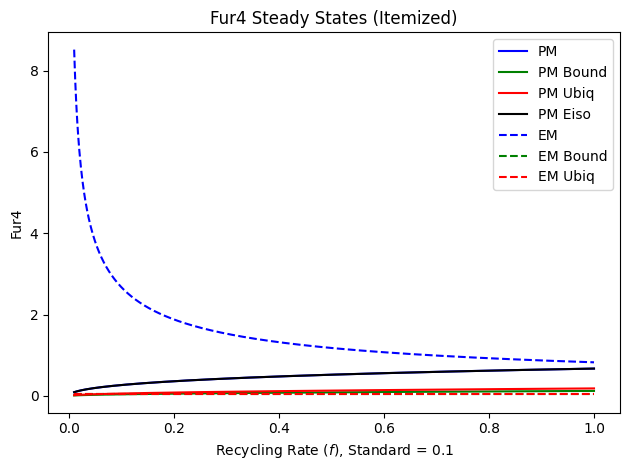

In [13]:
# Steady States Varying Recycling Rate

# Define Parameters
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()

# Define domain of the varying parameter
min_level = 0.01
max_level = 1
vary_domain = np.linspace(min_level, max_level, 1000)
vary_param = f"Recycling Rate ($f$), Standard = {f}"

# Initialize lists of each variable
P_steadies = []
P_b_steadies = []
P_u_steadies = []
P_e_steadies = []
E_steadies = []
E_b_steadies = []
E_u_steadies = []
S_steadies = []

# Iterate through the varying values
for f in vary_domain:
    P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady = Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
    P_steadies.append(P_steady)
    P_b_steadies.append(P_b_steady)
    P_u_steadies.append(P_u_steady)
    P_e_steadies.append(P_e_steady)
    E_steadies.append(E_steady)
    E_b_steadies.append(E_b_steady)
    E_u_steadies.append(E_u_steady)
    S_steadies.append(S_steady)

vary_plot(vary_domain, vary_param, P_steadies, P_b_steadies, P_u_steadies, P_e_steadies, E_steadies, E_b_steadies, E_u_steadies, S_steadies)

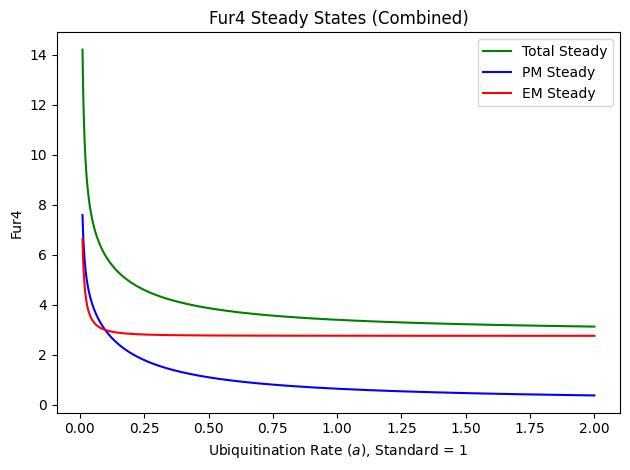

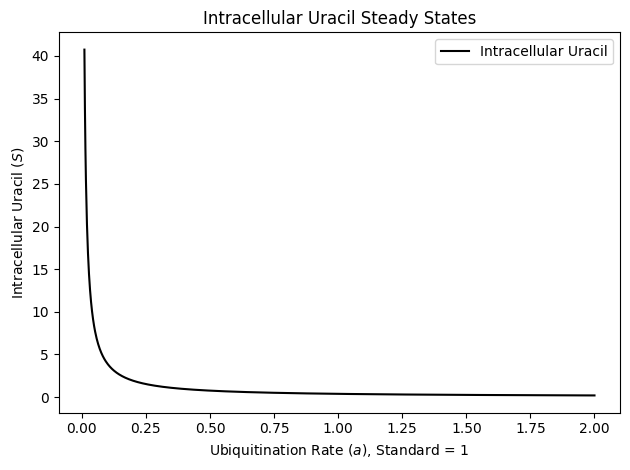

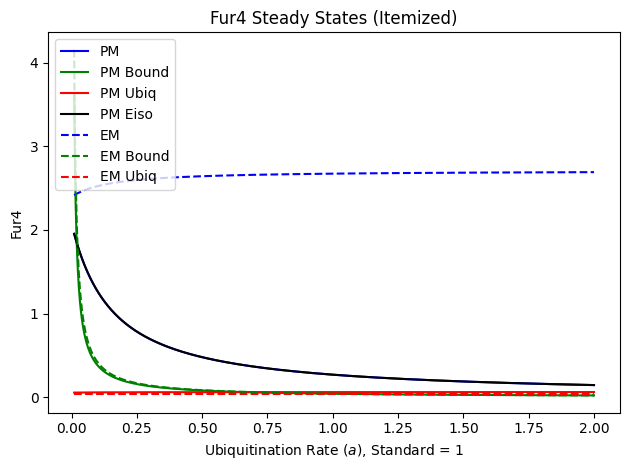

In [14]:
# Steady States Varying Ubiquitination Rate

# Define Parameters
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()

# Define domain of the varying parameter
min_level = 0.01
max_level = 2
vary_domain = np.linspace(min_level, max_level, 1000)
vary_param = f"Ubiquitination Rate ($a$), Standard = {a}"

# Initialize lists of each variable
P_steadies = []
P_b_steadies = []
P_u_steadies = []
P_e_steadies = []
E_steadies = []
E_b_steadies = []
E_u_steadies = []
S_steadies = []

# Iterate through the varying values
for a in vary_domain:
    P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady = Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
    P_steadies.append(P_steady)
    P_b_steadies.append(P_b_steady)
    P_u_steadies.append(P_u_steady)
    P_e_steadies.append(P_e_steady)
    E_steadies.append(E_steady)
    E_b_steadies.append(E_b_steady)
    E_u_steadies.append(E_u_steady)
    S_steadies.append(S_steady)

vary_plot(vary_domain, vary_param, P_steadies, P_b_steadies, P_u_steadies, P_e_steadies, E_steadies, E_b_steadies, E_u_steadies, S_steadies)

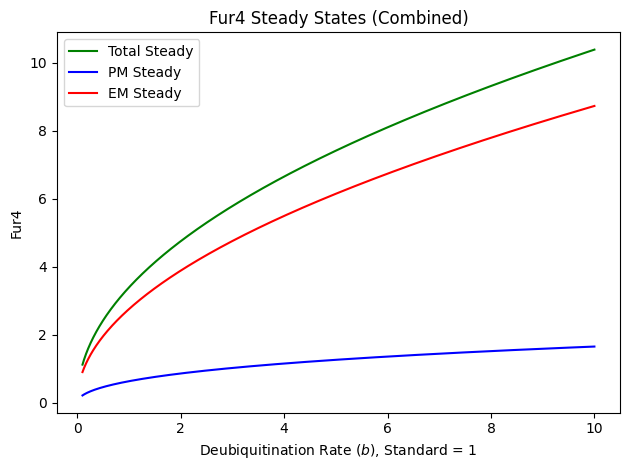

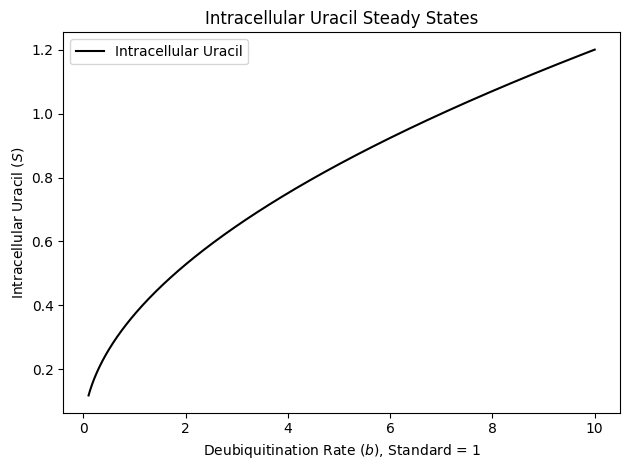

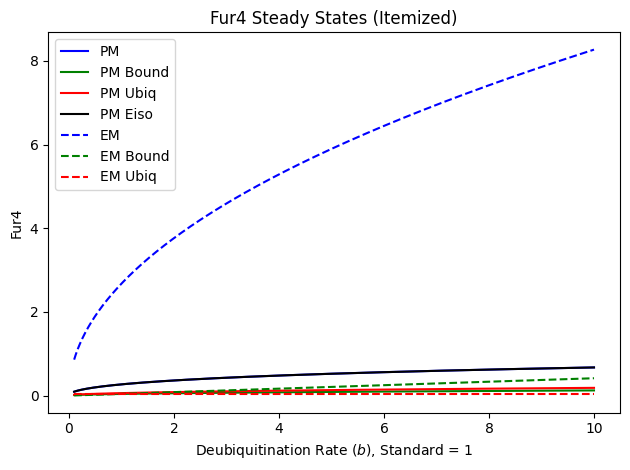

In [15]:
# Steady States Varying Deubiquitination Rate

# Define Parameters
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()

# Define domain of the varying parameter
min_level = 0.1
max_level = 10
vary_domain = np.linspace(min_level, max_level, 1000)
vary_param = f"Deubiquitination Rate ($b$), Standard = {b}"

# Initialize lists of each variable
P_steadies = []
P_b_steadies = []
P_u_steadies = []
P_e_steadies = []
E_steadies = []
E_b_steadies = []
E_u_steadies = []
S_steadies = []

# Iterate through the varying values
for b in vary_domain:
    P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady = Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
    P_steadies.append(P_steady)
    P_b_steadies.append(P_b_steady)
    P_u_steadies.append(P_u_steady)
    P_e_steadies.append(P_e_steady)
    E_steadies.append(E_steady)
    E_b_steadies.append(E_b_steady)
    E_u_steadies.append(E_u_steady)
    S_steadies.append(S_steady)

vary_plot(vary_domain, vary_param, P_steadies, P_b_steadies, P_u_steadies, P_e_steadies, E_steadies, E_b_steadies, E_u_steadies, S_steadies)

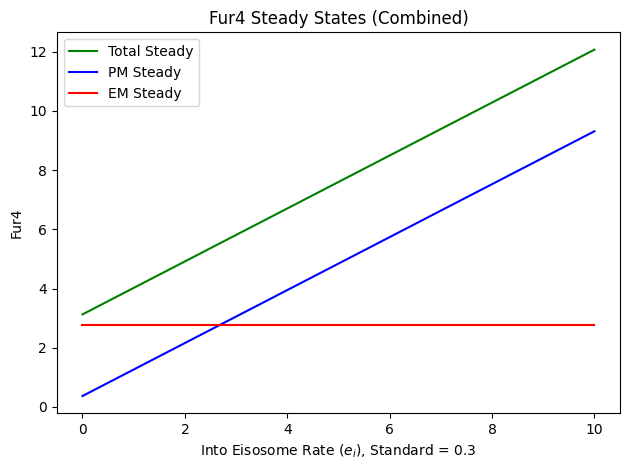

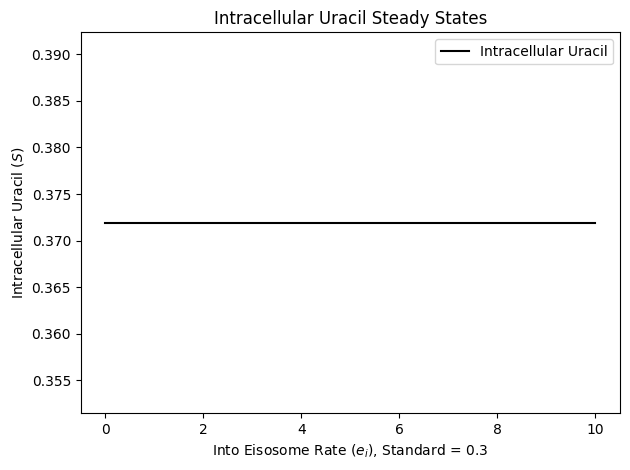

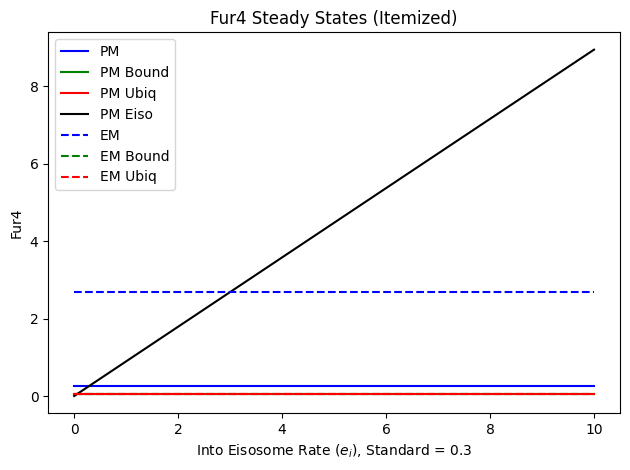

In [16]:
# Steady States Varying Into Eisosome Rate

# Define Parameters
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()

# Define domain of the varying parameter
min_level = 0
max_level = 10
vary_domain = np.linspace(min_level, max_level, 1000)
vary_param = f"Into Eisosome Rate ($e_i$), Standard = {e_i}"

# Initialize lists of each variable
P_steadies = []
P_b_steadies = []
P_u_steadies = []
P_e_steadies = []
E_steadies = []
E_b_steadies = []
E_u_steadies = []
S_steadies = []

# Iterate through the varying values
for e_i in vary_domain:
    P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady = Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
    P_steadies.append(P_steady)
    P_b_steadies.append(P_b_steady)
    P_u_steadies.append(P_u_steady)
    P_e_steadies.append(P_e_steady)
    E_steadies.append(E_steady)
    E_b_steadies.append(E_b_steady)
    E_u_steadies.append(E_u_steady)
    S_steadies.append(S_steady)

vary_plot(vary_domain, vary_param, P_steadies, P_b_steadies, P_u_steadies, P_e_steadies, E_steadies, E_b_steadies, E_u_steadies, S_steadies)

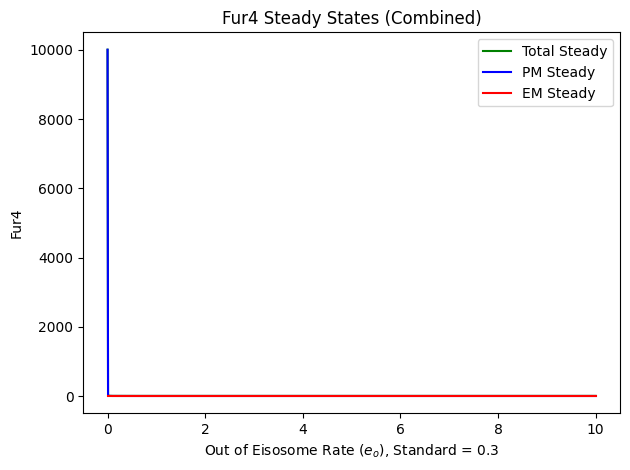

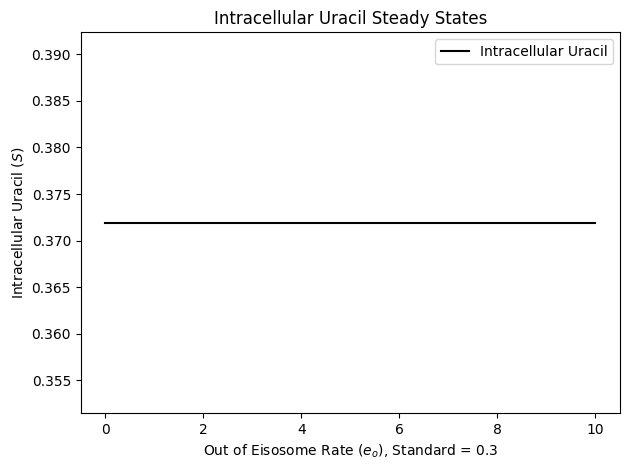

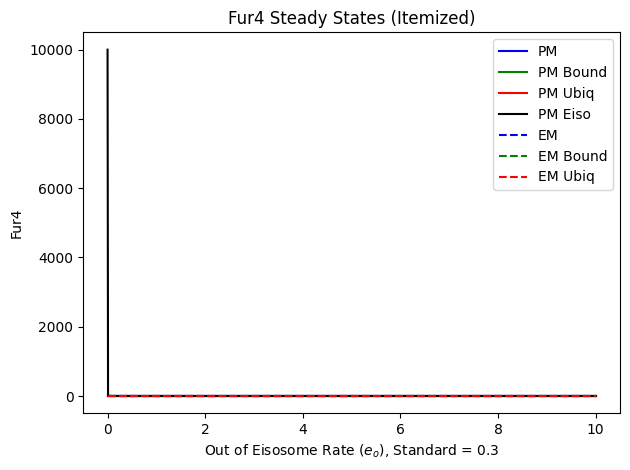

In [17]:
# Steady States Varying Out of Eisosome Rate

# Define Parameters
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()

# Define domain of the varying parameter
min_level = 0
max_level = 10
vary_domain = np.linspace(min_level, max_level, 1000)
vary_param = f"Out of Eisosome Rate ($e_o$), Standard = {e_o}"

# Initialize lists of each variable
P_steadies = []
P_b_steadies = []
P_u_steadies = []
P_e_steadies = []
E_steadies = []
E_b_steadies = []
E_u_steadies = []
S_steadies = []

# Iterate through the varying values
for e_o in vary_domain:
    P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady = Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
    P_steadies.append(P_steady)
    P_b_steadies.append(P_b_steady)
    P_u_steadies.append(P_u_steady)
    P_e_steadies.append(P_e_steady)
    E_steadies.append(E_steady)
    E_b_steadies.append(E_b_steady)
    E_u_steadies.append(E_u_steady)
    S_steadies.append(S_steady)

vary_plot(vary_domain, vary_param, P_steadies, P_b_steadies, P_u_steadies, P_e_steadies, E_steadies, E_b_steadies, E_u_steadies, S_steadies)

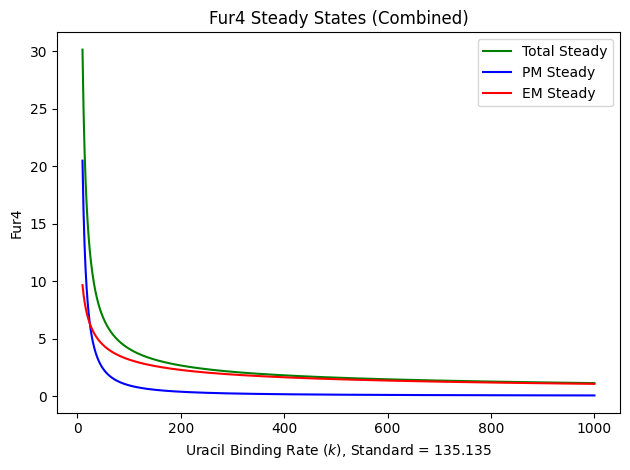

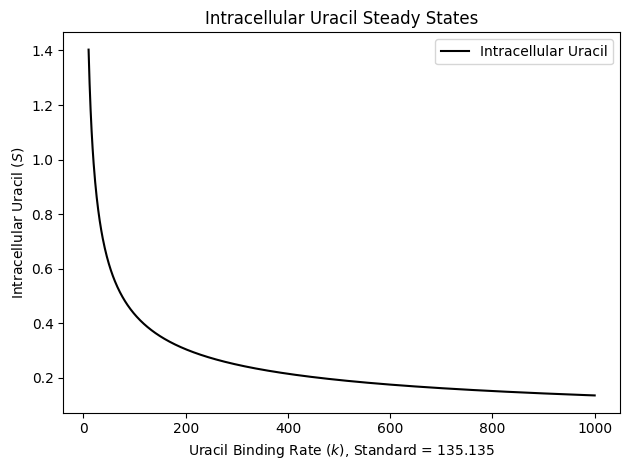

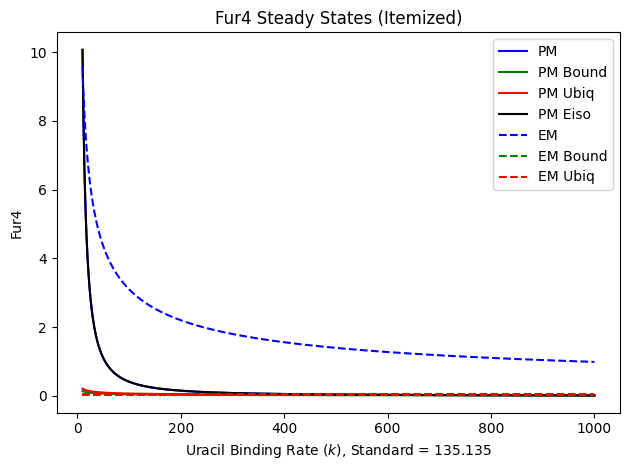

In [18]:
# Steady States Varying Uracil Binding Rate

# Define Parameters
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()

# Define domain of the varying parameter
min_level = 10
max_level = 1000
vary_domain = np.linspace(min_level, max_level, 1000)
vary_param = f"Uracil Binding Rate ($k$), Standard = {round(k,3)}"

# Initialize lists of each variable
P_steadies = []
P_b_steadies = []
P_u_steadies = []
P_e_steadies = []
E_steadies = []
E_b_steadies = []
E_u_steadies = []
S_steadies = []

# Iterate through the varying values
for k in vary_domain:
    P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady = Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
    P_steadies.append(P_steady)
    P_b_steadies.append(P_b_steady)
    P_u_steadies.append(P_u_steady)
    P_e_steadies.append(P_e_steady)
    E_steadies.append(E_steady)
    E_b_steadies.append(E_b_steady)
    E_u_steadies.append(E_u_steady)
    S_steadies.append(S_steady)

vary_plot(vary_domain, vary_param, P_steadies, P_b_steadies, P_u_steadies, P_e_steadies, E_steadies, E_b_steadies, E_u_steadies, S_steadies)

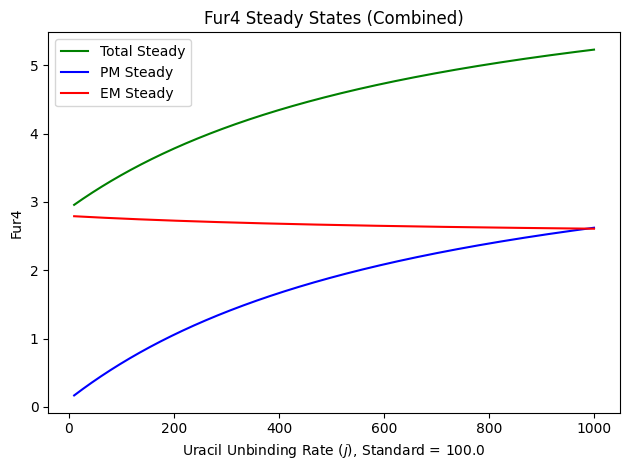

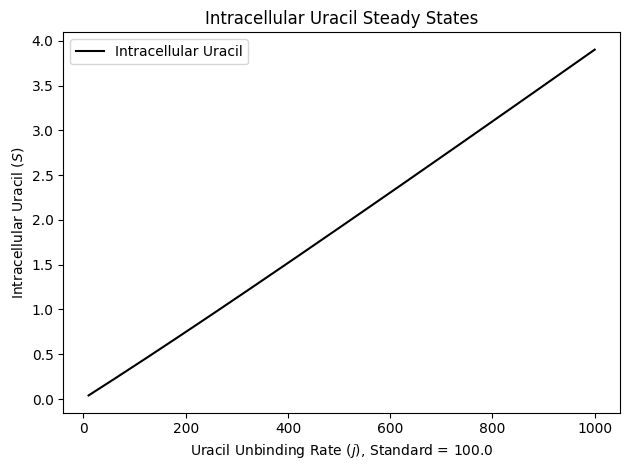

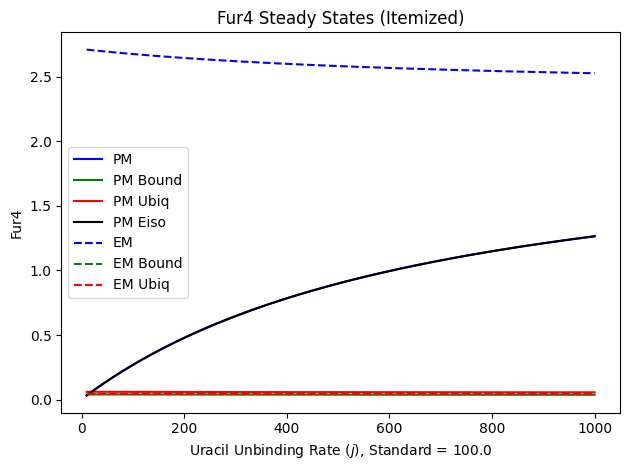

In [19]:
# Steady States Varying Uracil Unbinding Rate

# Define Parameters
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()

# Define domain of the varying parameter
min_level = 10
max_level = 1000
vary_domain = np.linspace(min_level, max_level, 1000)
vary_param = f"Uracil Unbinding Rate ($j$), Standard = {j}"

# Initialize lists of each variable
P_steadies = []
P_b_steadies = []
P_u_steadies = []
P_e_steadies = []
E_steadies = []
E_b_steadies = []
E_u_steadies = []
S_steadies = []

# Iterate through the varying values
for j in vary_domain:
    P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady = Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
    P_steadies.append(P_steady)
    P_b_steadies.append(P_b_steady)
    P_u_steadies.append(P_u_steady)
    P_e_steadies.append(P_e_steady)
    E_steadies.append(E_steady)
    E_b_steadies.append(E_b_steady)
    E_u_steadies.append(E_u_steady)
    S_steadies.append(S_steady)

vary_plot(vary_domain, vary_param, P_steadies, P_b_steadies, P_u_steadies, P_e_steadies, E_steadies, E_b_steadies, E_u_steadies, S_steadies)

0.04102626737371148


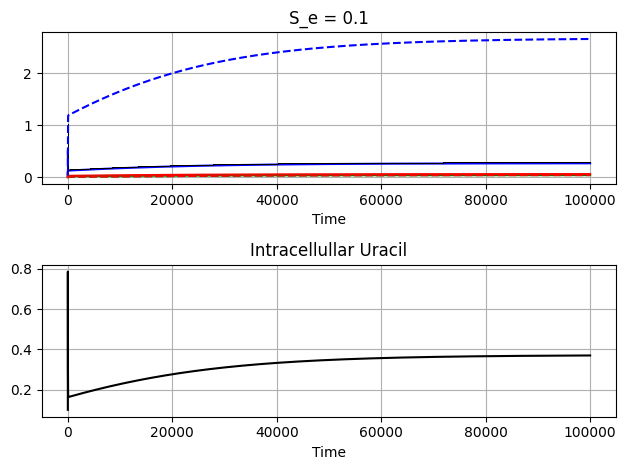

0.04102626737371148


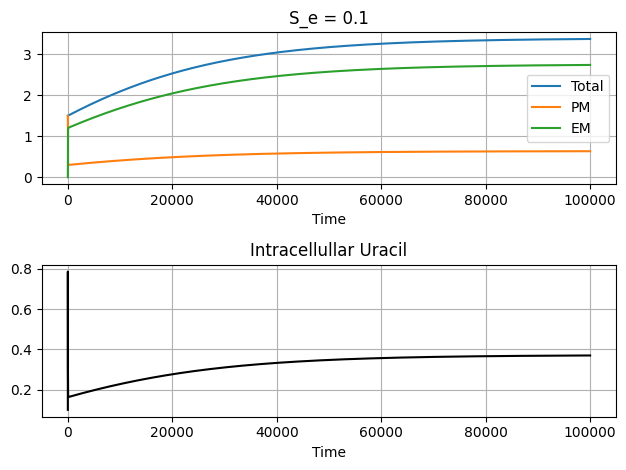

In [39]:
# Timecourse Experiments

#Define Initial Condition, Timespan, and rates to test
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()


S_e = 0.1
y0 = [0.5, 0, 0, 1, 0, 0, 0, .1]

T = int(1e5)
num = 10*T
t = np.linspace(0, T, num)


#Defining subplot
plt1 = plt.subplot(int(f"211"))
#Finding solution to ODE
t, sol = Solve_ODE(ODE, y0, T, num, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
# print(sol)
#Plotting solution
plt1.plot(t,sol[:,0],'b',label = "PM Ground State")
plt1.plot(t,sol[:,1],'g',label = "PM Bound")
plt1.plot(t,sol[:,2],'r',label = "PM Ubiquitinated")
plt1.plot(t,sol[:,3],'k,',label = "Eisosome")
plt1.plot(t,sol[:,4],'b--',label = "EM Ground State")
plt1.plot(t,sol[:,5],'g--',label = "EM Bound")
plt1.plot(t,sol[:,6],'r--',label = "EM Ubiquitinated")
plt1.set_xlabel("Time")
# plt.legend()
plt.grid()
plt1.set_title(f"S_e = {S_e}")
plt2 = plt.subplot(int(f"212"))
plt2.plot(t,sol[:,7],'k',label = "Intracellullar Uracil")
plt2.set_xlabel("Time")
plt2.set_title("Intracellullar Uracil")
#Setting graph layout
# plt.legend()
plt.grid()
plt1.set_xlabel("Time")
print(sol[:,6][-1])


plt.tight_layout()
plt.show()


#Defining subplot
plt1 = plt.subplot(int(f"211"))
# print(sol)

PM = sol[:,0] + sol[:,1] + sol[:,2] + sol[:,3]
EM = sol[:,4] + sol[:,5] + sol[:,6]
#Plotting solution
plt1.plot(t,PM+EM,label = "Total")
plt1.plot(t,PM,label = "PM")
plt1.plot(t,EM,label = "EM")
plt1.set_xlabel("Time")
plt.legend()
# plt.legend()
plt.grid()
plt1.set_title(f"S_e = {S_e}")
plt2 = plt.subplot(int(f"212"))
plt2.plot(t,sol[:,7],'k',label = "Intracellullar Uracil")
plt2.set_xlabel("Time")
plt2.set_title("Intracellullar Uracil")
#Setting graph layout
# plt.legend()
plt.grid()
plt1.set_xlabel("Time")
print(sol[:,6][-1])


plt.tight_layout()
plt.show()